# Visual data analysis in Python Part #1

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns

sns.set()

# Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg'

DATA_URL = "https://raw.githubusercontent.com/Yorko/mlcourse.ai/master/data/"
df = pd.read_csv(DATA_URL + "telecom_churn.csv")

In [2]:
df.head()

State  Account length  Area code International plan Voice mail plan  \
0    KS             128        415                 No             Yes   
1    OH             107        415                 No             Yes   
2    NJ             137        415                 No              No   
3    OH              84        408                Yes              No   
4    OK              75        415                Yes              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   Total night minutes  Total night calls  Total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   Total intl minutes  Total intl calls  Total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   Customer service calls  Churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False

# 1. Univariate visualization

## 1.1 Quantitative features

### Histograms and density plots

array([[<AxesSubplot:title={'center':'Total day minutes'}>,
        <AxesSubplot:title={'center':'Total intl minutes'}>]],
      dtype=object)

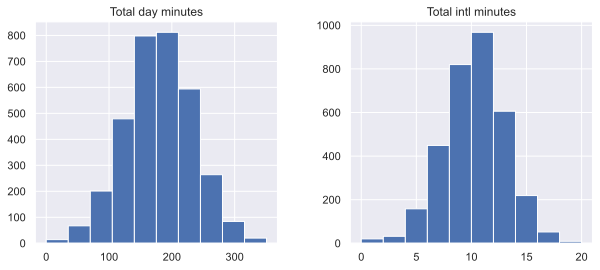

In [4]:
features = ["Total day minutes", "Total intl minutes"]
df[features].hist(figsize=(10,4))

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>]],
      dtype=object)

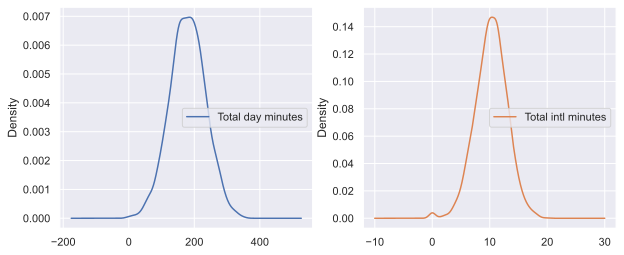

In [13]:
df[features].plot(kind="density", subplots=True, layout=(1, 2), sharex=False, figsize=(10, 4))

<AxesSubplot:xlabel='Total intl calls', ylabel='Density'>

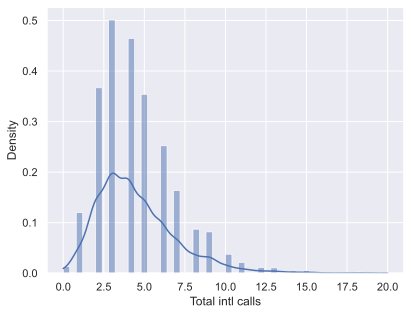

In [21]:
sns.histplot(df["Total intl calls"], kde=True, stat='density')

### Box plot

<AxesSubplot:xlabel='Total intl calls'>

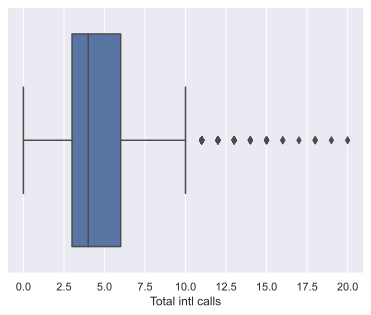

In [23]:
sns.boxplot(x="Total intl calls", data=df)

### Violin plot

<AxesSubplot:>

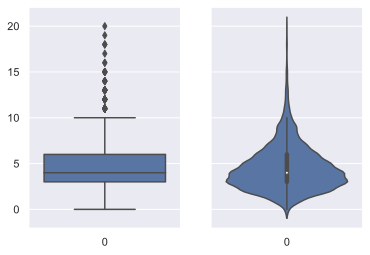

In [30]:
_, axis = plt.subplots(nrows=1, ncols=2, figsize=(6,4), sharey=True)
sns.boxplot(data=df["Total intl calls"], ax=axis[0])
sns.violinplot(data=df["Total intl calls"], ax=axis[1])

#### The difference between the box and violin plots is that the former illustrates certain statistics concerning individual examples in a dataset while the violin plot concentrates more on the smoothed distribution as a whole.

### Describe()

In [28]:
df[features].describe()

Total day minutes  Total intl minutes
count        3333.000000         3333.000000
mean          179.775098           10.237294
std            54.467389            2.791840
min             0.000000            0.000000
25%           143.700000            8.500000
50%           179.400000           10.300000
75%           216.400000           12.100000
max           350.800000           20.000000

## 1.2 Categorical and binary features

### Frequency table

In [29]:
df["Churn"].value_counts()

False    2850
True      483
Name: Churn, dtype: int64

### Bar plot

<AxesSubplot:xlabel='Customer service calls', ylabel='count'>

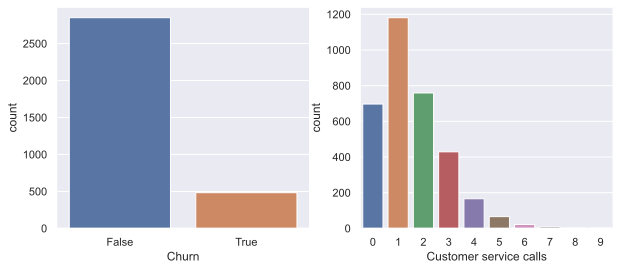

In [37]:
_, axis = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
sns.countplot(x="Churn",data=df, ax=axis[0])
sns.countplot(x="Customer service calls", data=df, ax=axis[1])

# 2. Multivariate visualization

## 3.1 Quantitative vs. Quantitative

### Correlation matrix

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

<AxesSubplot:>

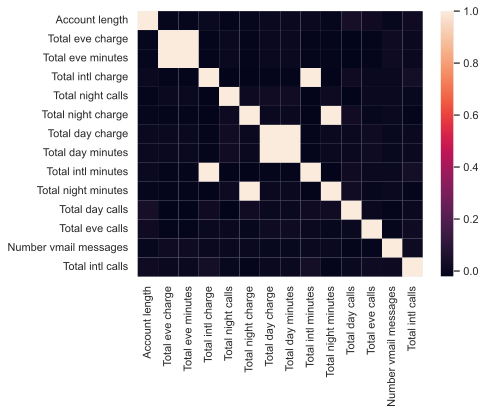

In [45]:
exclude = set([
    "State",
    "International plan",
    "Voice mail plan",
    "Area code",
    "Churn",
    "Customer service calls",
])

numeric = list(
    set(df.columns) - exclude 
)

corr_matrix = df[numeric].corr()
sns.heatmap(data=corr_matrix)

####  "Total day charge", "Total eve charge", "Total night charge", "Total intl charge", are dependent variables and calculated directly from another variable and contribute no additional information

<AxesSubplot:>

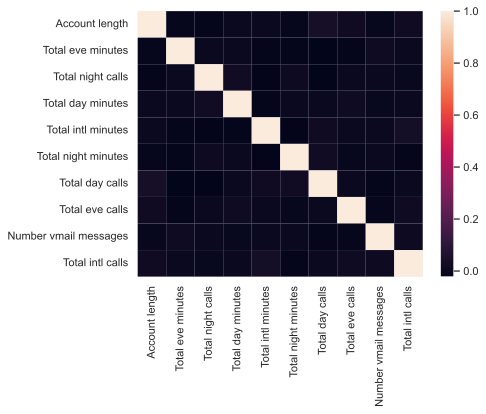

In [46]:
exclude = set([
    "State",
    "International plan",
    "Voice mail plan",
    "Area code",
    "Churn",
    "Customer service calls",
    
    "Total day charge",
    "Total eve charge",
    "Total night charge",
    "Total intl charge",
])

numeric = list(
    set(df.columns) - exclude 
)

corr_matrix = df[numeric].corr()
sns.heatmap(data=corr_matrix)

### Scatter plot

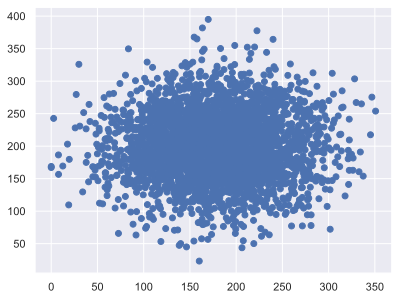

In [47]:
plt.scatter(x=df["Total day minutes"], y=df["Total night minutes"])

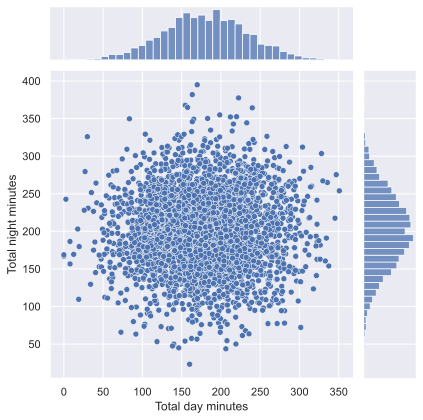

In [48]:
sns.jointplot(x="Total day minutes", y="Total night minutes", data=df, kind="scatter")

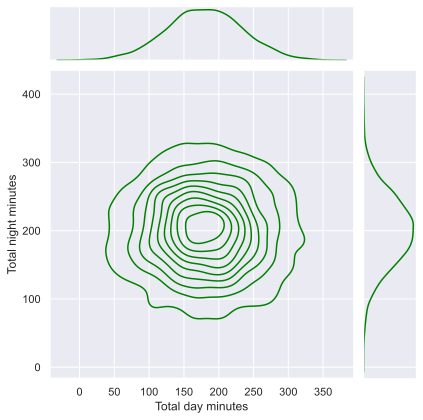

In [51]:
sns.jointplot(x="Total day minutes", y="Total night minutes", data=df, kind="kde", color="green")

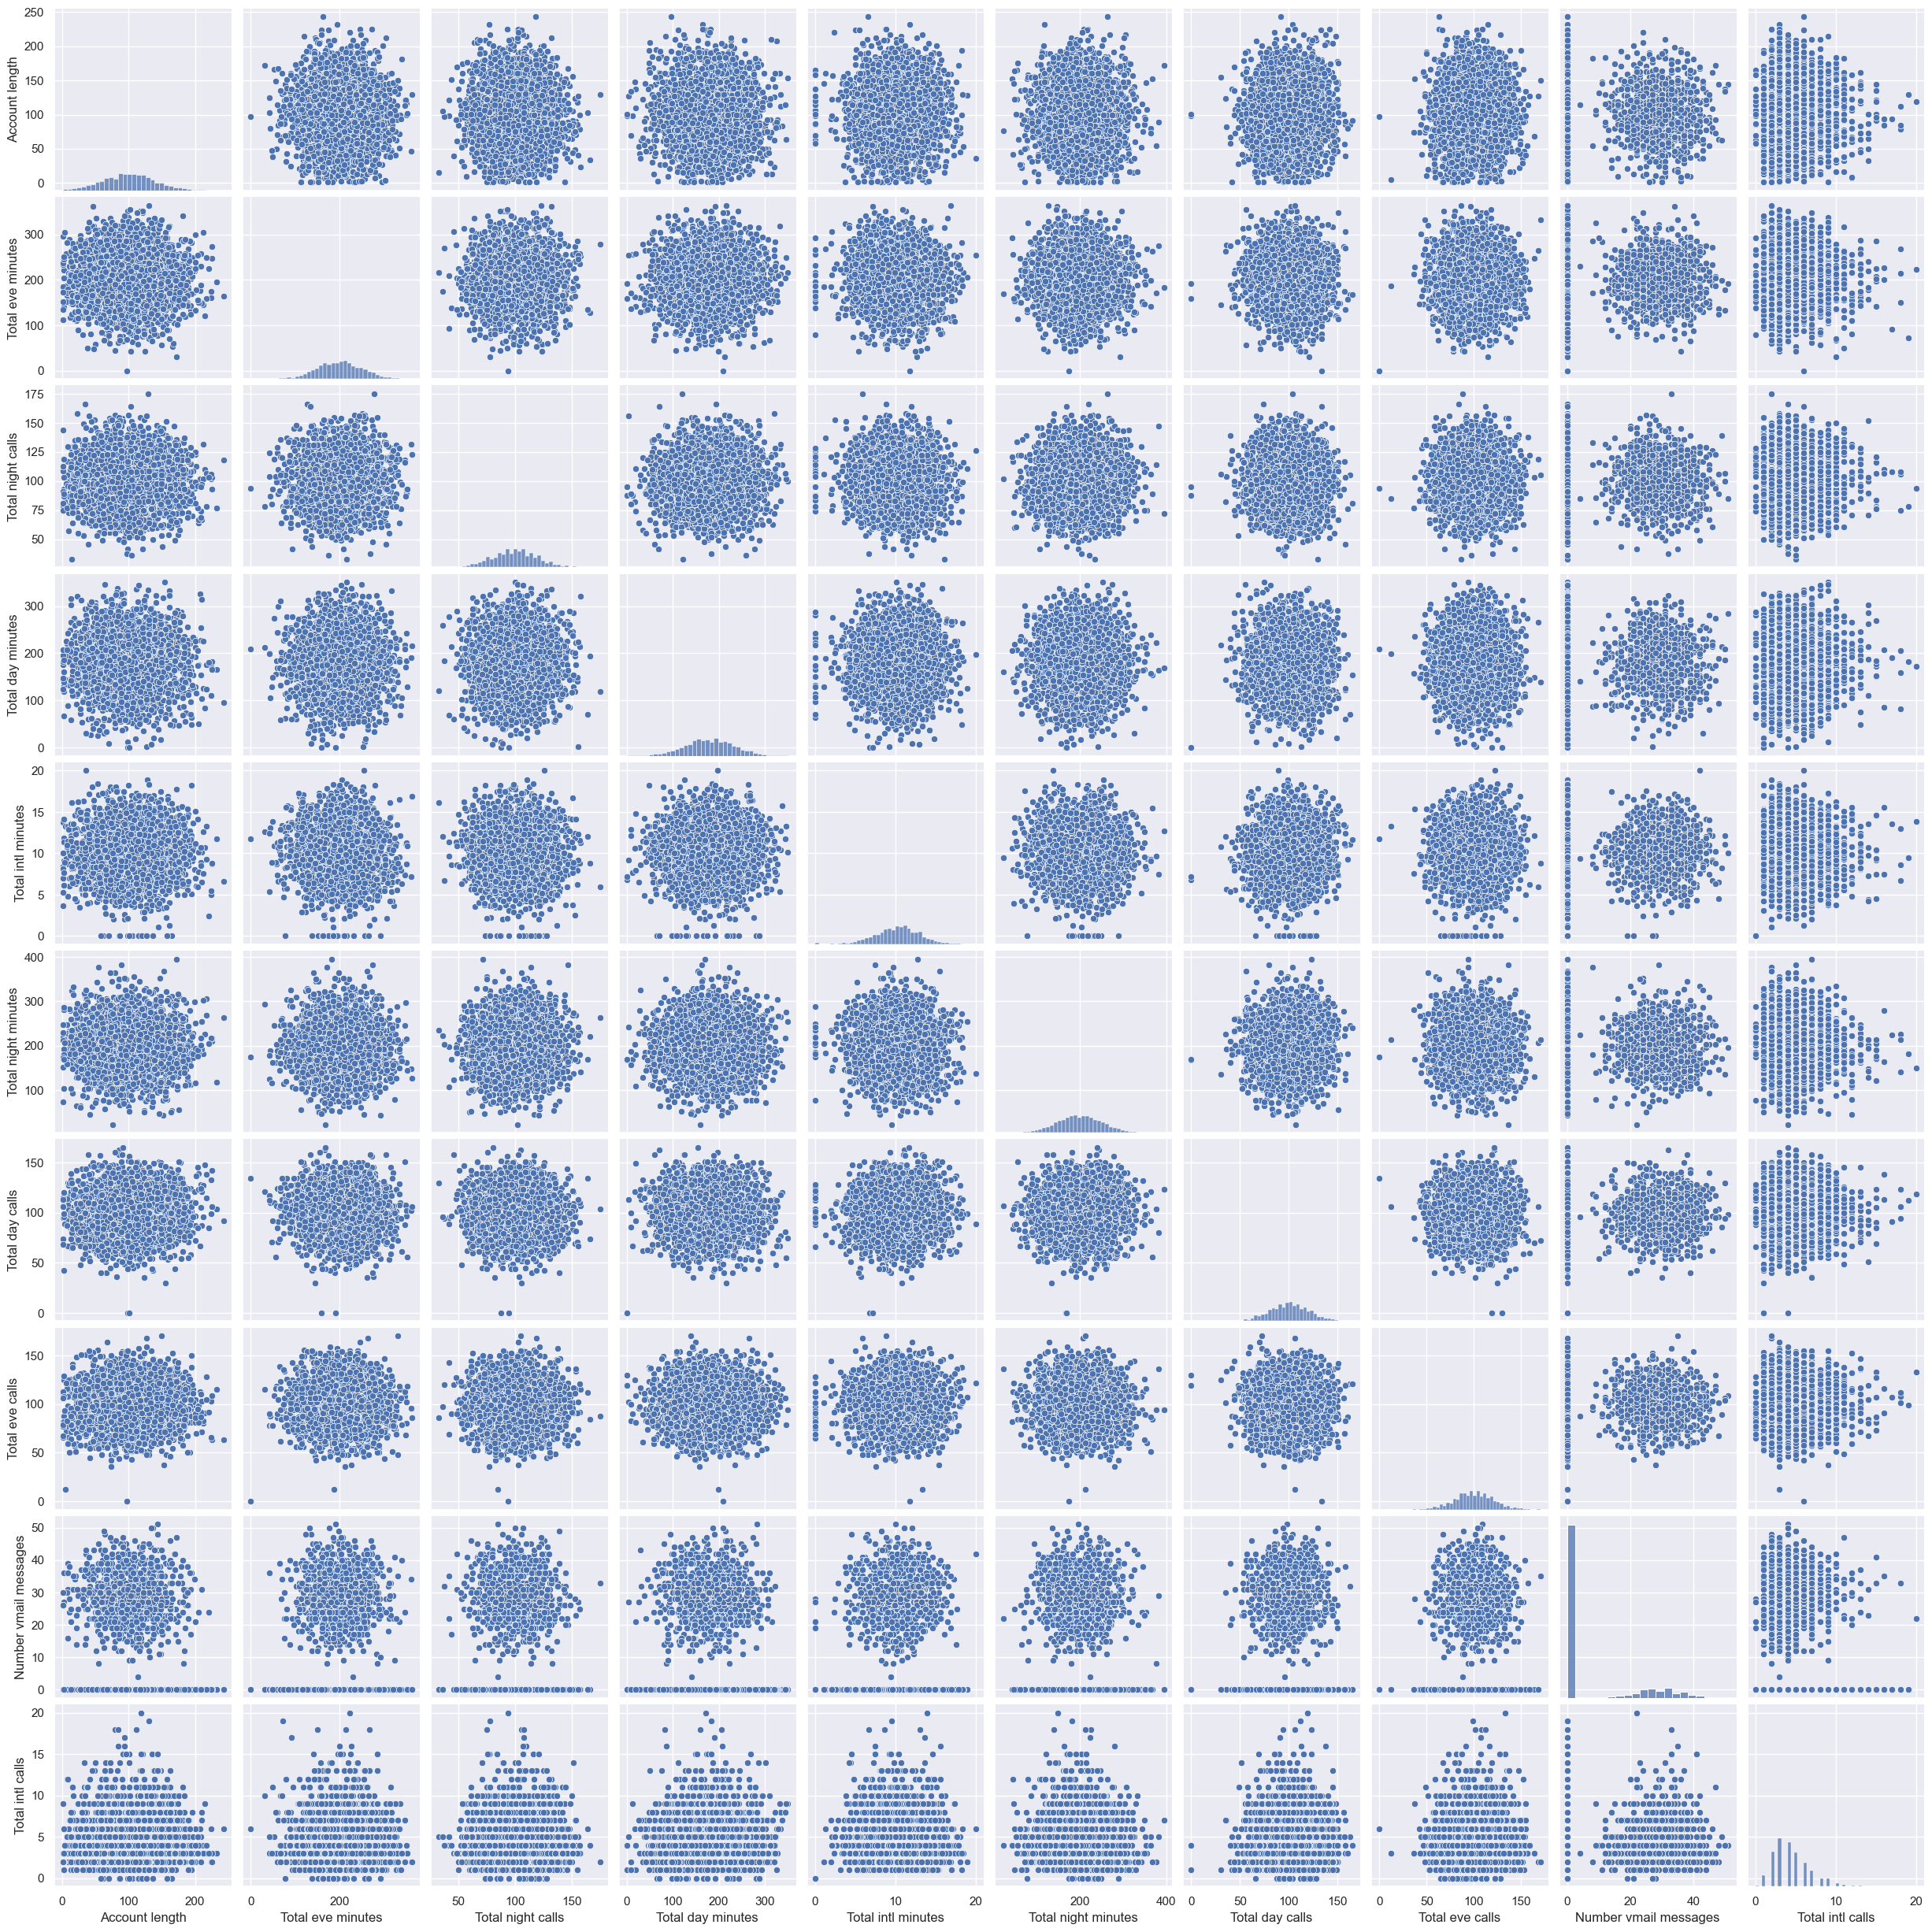

In [55]:
# `pairplot()` may become very slow with the SVG format
%config InlineBackend.figure_format = 'png'
sns.pairplot(df[numeric])

In [56]:
%config InlineBackend.figure_format = 'svg'

# 2.2 Quantitative vs. Categorical

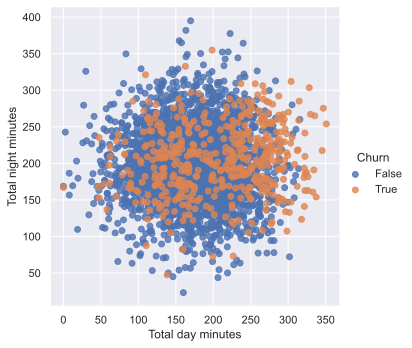

In [58]:
sns.lmplot(x="Total day minutes", y="Total night minutes", data=df, hue="Churn", fit_reg=False)

### Visualize the distribution statistics of the numerical variables in two disjoint groups: the loyal customers (Churn=False) and those who left (Churn=True).

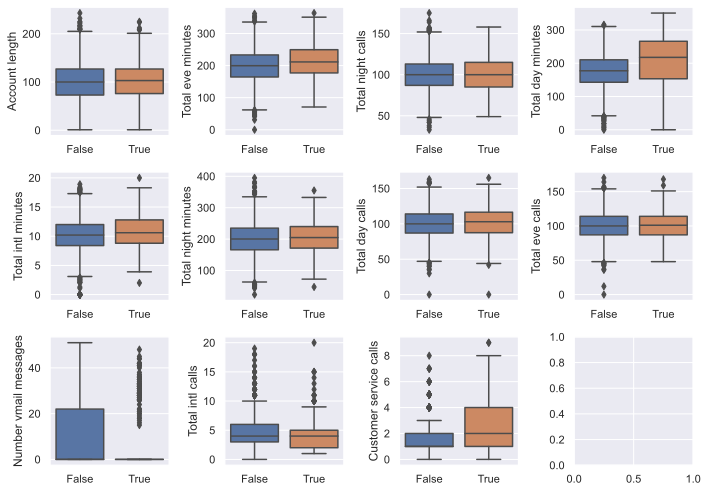

In [59]:
numeric.append("Customer service calls")
fig, axis = plt.subplots(nrows=3, ncols=4, figsize=(10,7))
for ind, feat in enumerate(numeric):
    ax = axis[int(ind/4), ind %4]
    sns.boxplot(x="Churn", y=feat, data=df, ax=ax)
    ax.set_xlabel('')
    ax.set_ylabel(feat)
fig.tight_layout()

### ^^From this chart, we can see that the greatest discrepancy in distribution between the two groups is for three variables: Total day minutes, Customer service calls, and Number vmail messages.

<AxesSubplot:xlabel='Churn', ylabel='Total day minutes'>

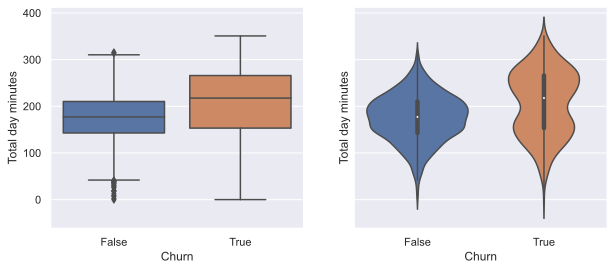

In [60]:
_, axes = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(10, 4))

sns.boxplot(x="Churn", y="Total day minutes", data=df, ax=axes[0])
sns.violinplot(x="Churn", y="Total day minutes", data=df, ax=axes[1])

###  ^^Disloyal customers tend to talk on the phone more.

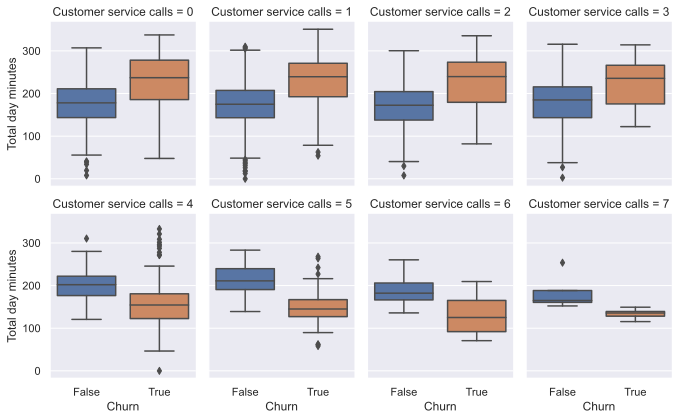

In [65]:
sns.catplot(
    x="Churn",
    y="Total day minutes",
    col="Customer service calls",
    data=df[df["Customer service calls"] < 8],
    kind="box",
    col_wrap=4,
    height=3,
    aspect=0.8,
)

### ^^From this, we could conclude that, starting with 4 calls, Total day minutes may no longer be the main factor for customer churn

# 2.3 Categorical vs. Categorical

<AxesSubplot:xlabel='Customer service calls', ylabel='count'>

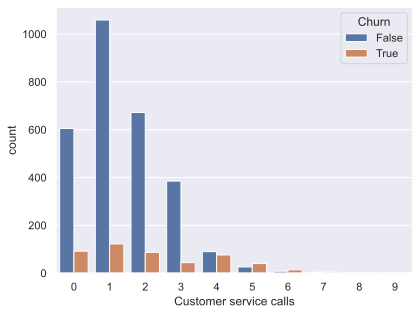

In [66]:
sns.countplot(x="Customer service calls", hue="Churn", data=df)

### ^^The churn rate increases significantly after 4 or more calls to customer service.

<AxesSubplot:xlabel='Voice mail plan', ylabel='count'>

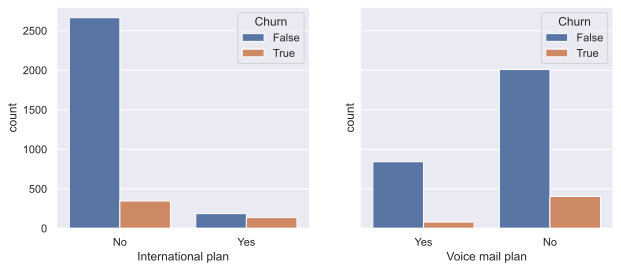

In [68]:
_, axes = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(10, 4))

sns.countplot(x="International plan", hue="Churn", data=df, ax=axes[0])
sns.countplot(x="Voice mail plan", hue="Churn", data=df, ax=axes[1])

### Contingency table

In [70]:
pd.crosstab(df["State"],df["Churn"]).T

State  AK  AL  AR  AZ  CA  CO  CT  DC  DE  FL  ...  SD  TN  TX  UT  VA  VT  \
Churn                                          ...                           
False  49  72  44  60  25  57  62  49  52  55  ...  52  48  54  62  72  65   
True    3   8  11   4   9   9  12   5   9   8  ...   8   5  18  10   5   8   

State  WA  WI  WV  WY  
Churn                  
False  52  71  96  68  
True   14   7  10   9  

[2 rows x 51 columns]

### Visualize churn rate for each state

In [73]:
df.groupby(["State"])["Churn"].agg([np.mean]).sort_values(by="mean", ascending=False).T

State        NJ        CA    TX        MD        SC        MI        MS  \
mean   0.264706  0.264706  0.25  0.242857  0.233333  0.219178  0.215385   

State        NV        WA        ME  ...        RI        WI        IL  \
mean   0.212121  0.212121  0.209677  ...  0.092308  0.089744  0.086207   

State        NE        LA        IA        VA      AZ        AK        HI  
mean   0.081967  0.078431  0.068182  0.064935  0.0625  0.057692  0.056604  

[1 rows x 51 columns]

# 3. Whole dataset visualizations

### 3.1 t-SNE (t-distributed Stochastic Neighbor Embedding)

###  Neighbor embedding is a search for a new and less-dimensional data representation that preserves neighborship of examples.

In [74]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [75]:
X = df.drop(["Churn", "State"], axis=1)
X["International plan"] = X["International plan"].map({"Yes": 1, "No": 0})
X["Voice mail plan"] = X["Voice mail plan"].map({"Yes": 1, "No": 0})
X.head()

Account length  Area code  International plan  Voice mail plan  \
0             128        415                   0                1   
1             107        415                   0                1   
2             137        415                   0                0   
3              84        408                   1                0   
4              75        415                   1                0   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   Total night minutes  Total night calls  Total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   Total intl minutes  Total intl calls  Total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   Customer service calls  
0                       1  
1                       1  
2                       0  
3                       2  
4                       3

In [76]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [77]:
%%time
tsne = TSNE(random_state=17)
tsne_repr = tsne.fit_transform(X_scaled)

c:\Users\Edgars\venv\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\Edgars\venv\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


CPU times: total: 2min 22s
Wall time: 21.2 s


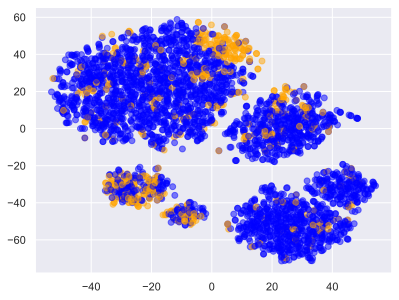

In [80]:
plt.scatter(tsne_repr[:, 0], tsne_repr[:, 1], alpha=0.5, c=df["Churn"].map({False:'blue', True:'orange'}))

### ^^We can see that customers who churned are concentrated in a few areas of the lower dimensional feature space.

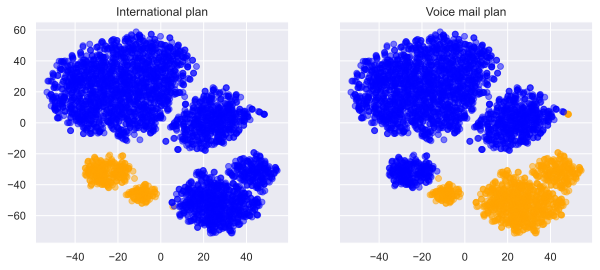

In [83]:
_, axis = plt.subplots(nrows=1, ncols=2, figsize=(10,4), sharey=True)

for i, name in enumerate(["International plan", "Voice mail plan"]):
    axis[i].scatter(tsne_repr[:, 0], tsne_repr[:, 1], c=df[name].map({"No":'blue', "Yes":'orange'}), alpha=0.5)
    axis[i].set_title(name)


### Now it is clear that, for example, many dissatisfied customers who canceled their subscription are crowded together in one cluster representing the people with the international plan but no voice mail.

#### In general, you shouldn’t make any far-reaching conclusions based on such graphs because it can equate to plain guessing.

#### https://github.com/DmitryUlyanov/Multicore-TSNE Better option for bigger dataset.